In [1]:
!pip install kaggle

In [17]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
#dataset api
!kaggle competitions download -c cifar-10

 99% 706M/715M [00:04<00:00, 114MB/s]
100% 715M/715M [00:04<00:00, 154MB/s]


In [19]:
!ls


cifar-10.zip  kaggle.json  sample_data


In [20]:
#extracting the compresed dataset
from zipfile import ZipFile
dataset='/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [21]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [22]:
!pip install py7zr

In [23]:
import py7zr
archive=py7zr.SevenZipFile( '/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [24]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


importing the dependencies

In [25]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [26]:
filenames=os.listdir('/content/train')

In [27]:
len(filenames)

50000

Labels processing

In [28]:
labels_df=pd.read_csv('/content/trainLabels.csv')

In [29]:
labels_df.shape

(50000, 2)

In [30]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [31]:
labels_df[labels_df['id']==7796]

,id,label
7795,7796,frog


In [32]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [33]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [34]:
labels_dictionary={'airplane':0 , 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'ship': 7, 'truck': 8, 'horse':9}

In [35]:
labels=[labels_dictionary[i] for i in labels_df['label']]

In [36]:
print(labels[0:5])

[6, 8, 8, 4, 1]


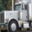

In [37]:
#displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/train/7765.png')
cv2_imshow(img)

In [38]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [39]:
id_list=list(labels_df['id'])

In [40]:
print(id_list[0:5])

[1, 2, 3, 4, 5]


Image Processing

In [41]:
#convert images to numpy arrays

train_data_folder='/content/train/'

data=[]
for id in id_list:
  image=Image.open(train_data_folder + str(id) + '.png')
  image=np.array(image)
  data.append(image)



In [42]:
type(data)

list

In [43]:
len(data)

50000

In [44]:
type(data[0])

numpy.ndarray

In [45]:
data[0].shape

(32, 32, 3)

In [46]:
#convert images and labels to numpy arrays


In [47]:
x=np.array(data)
y=np.array(labels)

In [48]:
type(x)

numpy.ndarray

In [49]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


train test split

In [50]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=55)

In [51]:
print(x.shape, x_train.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3)


Data Scaling

In [52]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [53]:
print(x_train_scaled[0])

[[[0.96078431 0.96078431 0.96078431]
  [0.94901961 0.94901961 0.94901961]
  [0.94901961 0.94901961 0.94901961]
  ...
  [0.95294118 0.95294118 0.95294118]
  [0.95294118 0.95294118 0.95294118]
  [0.94901961 0.94901961 0.94901961]]

 [[0.98039216 0.98039216 0.98039216]
  [0.96862745 0.96862745 0.96862745]
  [0.97254902 0.97254902 0.97254902]
  ...
  [0.97254902 0.97254902 0.97254902]
  [0.97254902 0.97254902 0.97254902]
  [0.97254902 0.97254902 0.97254902]]

 [[0.98039216 0.98039216 0.98039216]
  [0.96862745 0.96862745 0.96862745]
  [0.97254902 0.97254902 0.97254902]
  ...
  [0.96078431 0.96078431 0.96078431]
  [0.95686275 0.95686275 0.95686275]
  [0.95294118 0.95294118 0.95294118]]

 ...

 [[0.63921569 0.63921569 0.69019608]
  [0.55686275 0.55686275 0.61176471]
  [0.30980392 0.30980392 0.35686275]
  ...
  [0.65098039 0.65490196 0.71372549]
  [0.64313725 0.65098039 0.70980392]
  [0.63921569 0.64705882 0.69803922]]

 [[0.61176471 0.61960784 0.67058824]
  [0.56862745 0.57647059 0.63137255]


Building a neural netwrok

In [54]:
import tensorflow as tf
from tensorflow import keras

In [55]:
num_of_classes=10
#setting up the layers of neural network

model= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(80,activation='relu'),
    keras.layers.Dense(num_of_classes,activation='softmax')
])

In [56]:
#compiling the netork

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [57]:
#training the model

model.fit(x_train_scaled,y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 6s 4ms/step - loss: 1.9490 - acc: 0.2922 - val_loss: 1.8476 - val_acc: 0.3248
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8193 - acc: 0.3450 - val_loss: 1.8260 - val_acc: 0.3325
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7859 - acc: 0.3582 - val_loss: 1.7764 - val_acc: 0.3620
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7702 - acc: 0.3652 - val_loss: 1.7520 - val_acc: 0.3658
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7465 - acc: 0.3738 - val_loss: 1.7209 - val_acc: 0.3783
Epoch 6/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7346 - acc: 0.3772 - val_loss: 1.7220 - val_acc: 0.3835
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7201 - acc: 0.3849 - val_loss: 1.7305 - val_acc: 0.3862
Epoch 8/10
1125/1125 [==============================] - 4s 3ms

Now, Using ResNet 50

In [58]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [59]:
convolutional_base= ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

94765736/94765736 [==============================] - 0s 0us/step


In [60]:
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [61]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))


In [62]:
#compiling the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [63]:
history= model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 467s 385ms/step - loss: 1.0707 - acc: 0.6573 - val_loss: 0.5794 - val_acc: 0.8195
Epoch 2/10
1125/1125 [==============================] - 435s 387ms/step - loss: 0.5018 - acc: 0.8634 - val_loss: 0.3176 - val_acc: 0.9107
Epoch 3/10
1125/1125 [==============================] - 435s 387ms/step - loss: 0.3186 - acc: 0.9269 - val_loss: 0.2520 - val_acc: 0.9247
Epoch 4/10
1125/1125 [==============================] - 435s 387ms/step - loss: 0.2177 - acc: 0.9568 - val_loss: 0.2574 - val_acc: 0.9255
Epoch 5/10
1125/1125 [==============================] - 428s 380ms/step - loss: 0.1545 - acc: 0.9758 - val_loss: 0.2298 - val_acc: 0.9320
Epoch 6/10
1125/1125 [==============================] - 428s 380ms/step - loss: 0.1170 - acc: 0.9833 - val_loss: 0.2376 - val_acc: 0.9285
Epoch 7/10
1125/1125 [==============================] - 435s 387ms/step - loss: 0.0911 - acc: 0.9891 - val_loss: 0.2266 - val_acc: 0.9333
Epoch 8/10
1125/1125 [============

In [64]:
loss,accuracy=model.evaluate(x_test_scaled, y_test)
print('test accuracy=',accuracy)

313/313 [==============================] - 38s 116ms/step - loss: 0.2337 - acc: 0.9366
test accuracy= 0.9366000294685364
